Question1

In [2]:
!pip install numpy
!pip install matplotlib
!pip3 install torch torchvision torchaudio
!pip install pandas
!pip3 install opencv-python
!pip install seaborn #installed all required packages

In [3]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
datadownload_train = datasets.MNIST(root='./data', train=True, download=True, transform = transform)
datadownload_test = datasets.MNIST(root='./data', train=False, download=True, transform = transform)

In [5]:
len(datadownload_train) #debugging if data length correct

60000

In [6]:
train = datadownload_train

In [7]:
from torch.utils.data import Subset
subset_idx = list(range(1000)) #creating a list of 1000 length
train_subset = Subset(train, subset_idx) #making a subset

In [8]:
len(train_subset) #debug length

1000

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
labelclass = [train_subset[i][1] for i in range(len(train_subset))] #pulling labels for all 1000
#labelclass

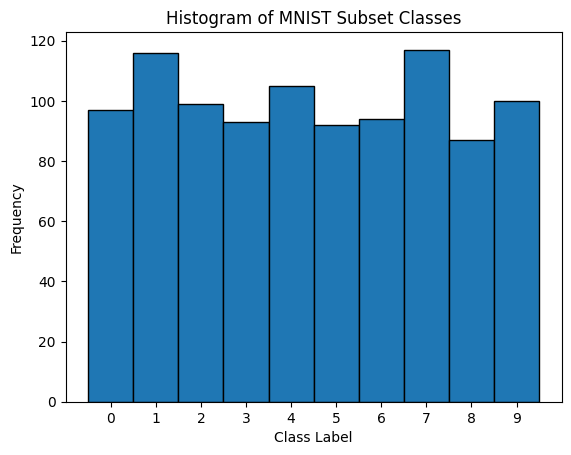

In [11]:
plt.hist(labelclass, bins=range(11), edgecolor='black', align='left')
plt.xticks(range(10))
plt.title('Histogram of MNIST Subset Classes')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

In [12]:
pip install einops #install required  packages

Note: you may need to restart the kernel to use updated packages.


In [13]:
from einops import rearrange
from torch.utils.data import DataLoader #dataloader framework to be used

In [14]:
batch_len = 25
dataloader = DataLoader(train_subset, batch_size=batch_len, shuffle=False) #it just provides a framework to go through  batches without shuffling

In [15]:
entire_data_batched = [] #empty variable is created
for batch in dataloader:
    images, labels = batch #var images has the curret image and labels have the current image label
    entire_data_batched.append((images,labels)) #here I am appending the batches as it is processed by the dataloader framework

In [16]:
len(entire_data_batched) #debug to verify the length should be 40 since 40*25 = 1000; 40 batches, each batch has 25 image and corresponding label

40

In [17]:
entire_data_batched[0][0].shape ##1st batch #debug

torch.Size([25, 1, 28, 28])

In [18]:
entire_data_batched[39][0].shape ##40th batch

torch.Size([25, 1, 28, 28])

In [19]:
entire_data_batched[0][0][1].shape ##2nd image of first batch

torch.Size([1, 28, 28])

In [20]:
entire_data_batched[0][1][0] ##label of 1st image of first batch

tensor(5)

In [83]:
import random #to randomly select any image
random_selected_batch = random.randint(0,len(entire_data_batched)-1)
idx_batch=random_selected_batch #randomly choosing batch
random_image_in_selectedbatch = random.randint(0,batch_len -1) #randomly select image within that batch
idx_img =random_image_in_selectedbatch

In [84]:
idx_img

1

In [86]:
pull_batch = entire_data_batched[idx_batch] #pulling up the image sequencilally , from batch first and then pull the selected image
pull_image = pull_batch[0][idx_img].squeeze().numpy() # shape(1,28,28) get changed to (28,28) due to squeeze and converted to numpy
pull_image.shape #debug if image is correct

(28, 28)

In [85]:
pull_imglabel = pull_image = pull_batch[1][idx_img]
pull_imglabel# looking at the selected image label to debug later the shape from 3-D graph

tensor(9)

In [65]:
x = np.arange(0, 28)
y = np.arange(0, 28)
x, y = np.meshgrid(x, y) #setting up plot

If the cell bellow gives an error, run the block which implements squeeze and numpy conversion of pull_img variable.

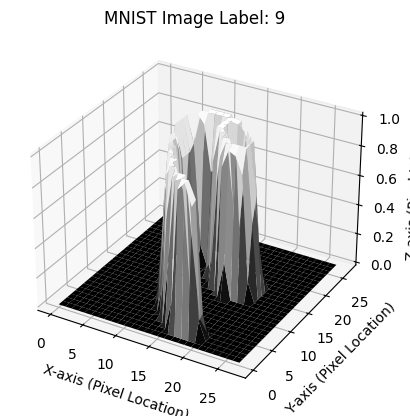

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, pull_image, cmap='gray')

ax.set_title(f'MNIST Image Label: {pull_imglabel}')
ax.set_xlabel('X-axis (Pixel Location)')
ax.set_ylabel('Y-axis (Pixel Location)')
ax.set_zlabel('Z-axis (Pixel Intensity)')

plt.show()

Question no 2

In [89]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates #mdates will be used later

In [91]:
df = pd.read_csv('energydata_complete.csv') #loading data as data frame

In [92]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [93]:
df['date'] = pd.to_datetime(df['date']) #conversion to date time

In [94]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [95]:
df.set_index('date', inplace=True)

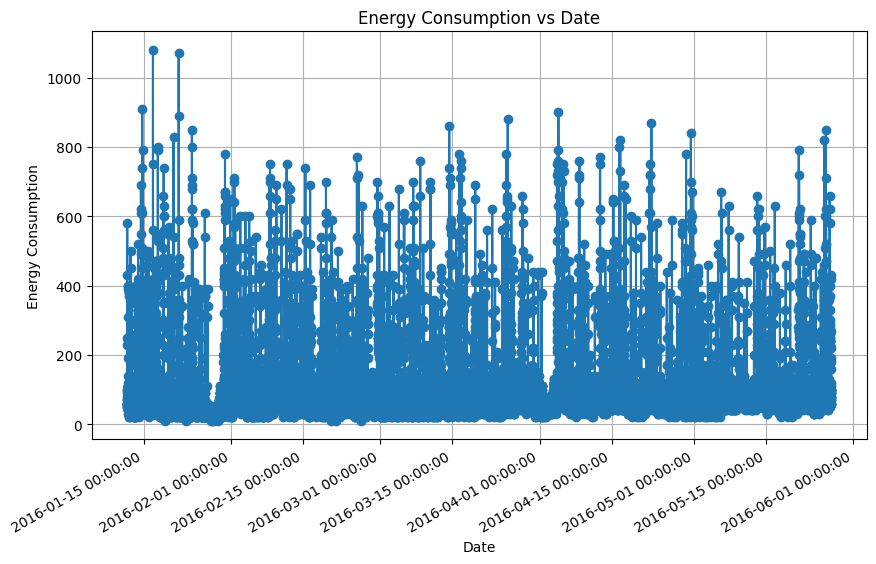

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Appliances'], marker='o', linestyle='-')
plt.title('Energy Consumption vs Date')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

In [97]:
#get 1 week data
start_date = '2016-01-12'
end_date = '2016-01-18' #7days
one_week_data = df.loc[start_date:end_date]

In [98]:
one_week_data #debug the number of rows

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 00:00:00,40,10,21.390000,44.560000,20.790000,43.863333,20.200000,45.663333,20.633333,46.790000,...,16.890000,45.700000,5.300000,736.9,92.000000,6.0,22.000000,4.100000,39.146638,39.146638
2016-01-12 00:10:00,30,20,21.290000,44.826667,20.700000,44.000000,20.200000,45.590000,20.566667,46.933333,...,16.890000,45.790000,5.266667,737.0,92.000000,6.0,25.000000,4.066667,27.651816,27.651816
2016-01-12 00:20:00,40,20,21.290000,44.966667,20.633333,44.000000,20.166667,45.500000,20.500000,47.133333,...,16.890000,45.863333,5.233333,737.1,92.000000,6.0,28.000000,4.033333,26.485979,26.485979
2016-01-12 00:30:00,50,20,21.260000,45.090000,20.600000,44.030000,20.100000,45.500000,20.500000,47.230000,...,16.890000,45.900000,5.200000,737.2,92.000000,6.0,31.000000,4.000000,39.467812,39.467812
2016-01-12 00:40:00,310,10,21.200000,45.090000,20.600000,44.090000,20.100000,45.500000,20.426667,47.230000,...,16.890000,45.966667,5.166667,737.3,92.000000,6.0,34.000000,3.966667,1.166560,1.166560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-18 23:10:00,50,10,20.600000,38.663333,19.533333,38.966667,20.290000,41.026667,20.600000,37.560000,...,17.000000,39.260000,-4.833333,756.6,87.833333,1.0,64.166667,-6.550000,20.385743,20.385743
2016-01-18 23:20:00,50,10,20.600000,38.790000,19.463333,39.030000,20.230000,40.826667,20.566667,37.730000,...,16.926667,39.200000,-4.766667,756.6,87.666667,1.0,64.333333,-6.500000,29.119402,29.119402
2016-01-18 23:30:00,40,20,20.533333,38.863333,19.390000,39.090000,20.200000,40.700000,20.500000,37.863333,...,16.890000,39.090000,-4.700000,756.6,87.500000,1.0,64.500000,-6.450000,15.446453,15.446453


In [99]:
one_week_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 00:00:00,40,10,21.39,44.560000,20.790000,43.863333,20.200000,45.663333,20.633333,46.790000,...,16.89,45.700000,5.300000,736.9,92.0,6.0,22.0,4.100000,39.146638,39.146638
2016-01-12 00:10:00,30,20,21.29,44.826667,20.700000,44.000000,20.200000,45.590000,20.566667,46.933333,...,16.89,45.790000,5.266667,737.0,92.0,6.0,25.0,4.066667,27.651816,27.651816
2016-01-12 00:20:00,40,20,21.29,44.966667,20.633333,44.000000,20.166667,45.500000,20.500000,47.133333,...,16.89,45.863333,5.233333,737.1,92.0,6.0,28.0,4.033333,26.485979,26.485979
2016-01-12 00:30:00,50,20,21.26,45.090000,20.600000,44.030000,20.100000,45.500000,20.500000,47.230000,...,16.89,45.900000,5.200000,737.2,92.0,6.0,31.0,4.000000,39.467812,39.467812
2016-01-12 00:40:00,310,10,21.20,45.090000,20.600000,44.090000,20.100000,45.500000,20.426667,47.230000,...,16.89,45.966667,5.166667,737.3,92.0,6.0,34.0,3.966667,1.166560,1.166560


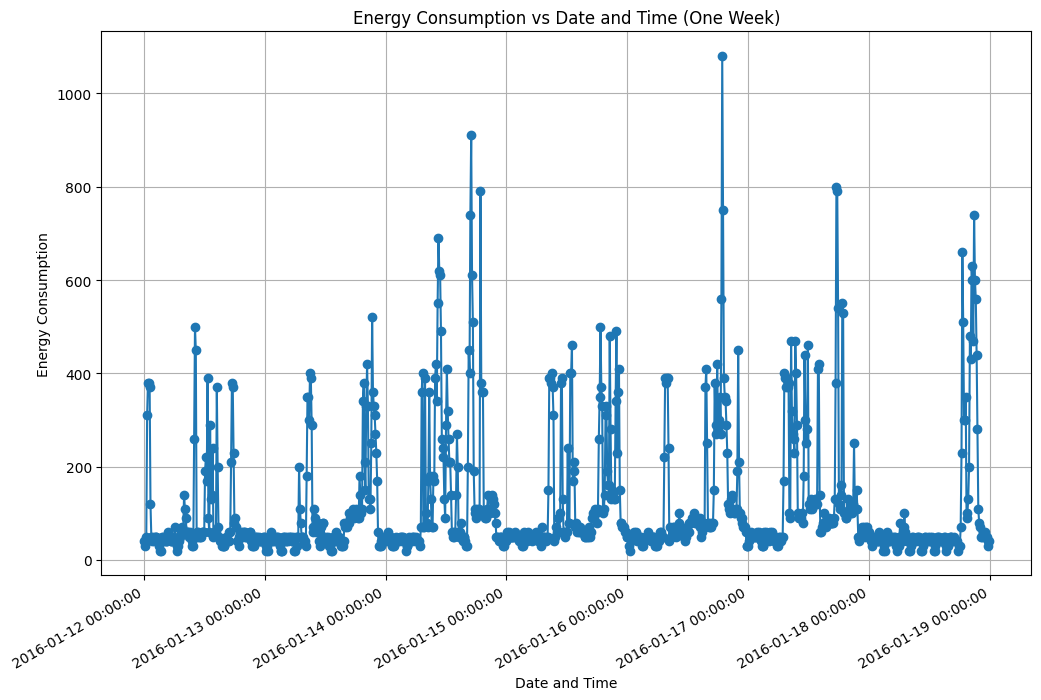

In [100]:
plt.figure(figsize=(12, 8))
plt.plot(one_week_data.index, one_week_data['Appliances'], marker='o', linestyle='-')
plt.title('Energy Consumption vs Date and Time (One Week)')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()

In [101]:
hourly_data = one_week_data.resample('h').sum() #summing up hourly data
hourly_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 00:00:00,850,100,127.596667,269.763333,123.823333,264.110000,120.866667,273.253333,123.086667,282.676667,...,101.340000,275.250000,31.30,4422.90,552.0,36.0,177.0,24.10,157.780308,157.780308
2016-01-12 01:00:00,1010,50,125.781667,273.679167,122.000000,265.640000,120.800000,273.240000,129.033333,281.680000,...,101.340000,277.846667,30.85,4427.00,552.0,33.5,240.0,23.65,172.338439,172.338439
2016-01-12 02:00:00,270,0,124.180000,277.186667,120.400000,267.020000,121.025000,272.725000,126.858333,275.433333,...,101.853333,283.580000,30.20,4431.30,552.0,27.5,240.0,23.00,103.694322,103.694322
2016-01-12 03:00:00,210,0,122.773333,277.440000,118.753333,267.360000,121.380000,272.566667,122.500000,276.653333,...,102.133333,288.500000,29.05,4435.15,554.5,29.0,240.0,22.10,145.341347,145.341347
2016-01-12 04:00:00,270,0,121.376667,278.901667,117.600000,267.906667,121.710000,273.150000,119.706667,278.380000,...,102.333333,292.965000,29.65,4438.35,553.0,33.5,240.0,22.30,169.146873,169.146873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-18 19:00:00,1170,50,117.446667,252.346667,109.582500,253.223333,116.933333,241.593333,109.906667,230.360000,...,101.486667,224.426667,-15.00,4540.35,485.5,18.0,151.5,-32.00,138.690160,138.690160
2016-01-18 20:00:00,3350,60,121.551667,248.442500,114.603333,252.226667,121.180000,258.566667,111.670000,231.545833,...,102.060000,235.980000,-16.25,4541.15,480.5,15.5,154.5,-34.05,145.040810,145.040810
2016-01-18 21:00:00,2070,70,123.853333,240.986667,117.502727,240.861515,126.173333,272.440000,126.840000,224.173333,...,101.073333,224.350000,-20.50,4540.30,505.5,12.0,134.0,-34.50,150.827778,150.827778


In [102]:
hourly_data['day'] = hourly_data.index.day_name()
hourly_data['hour'] = hourly_data.index.hour
pivot_table = hourly_data.pivot_table(index='hour', columns='day', values='Appliances')
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

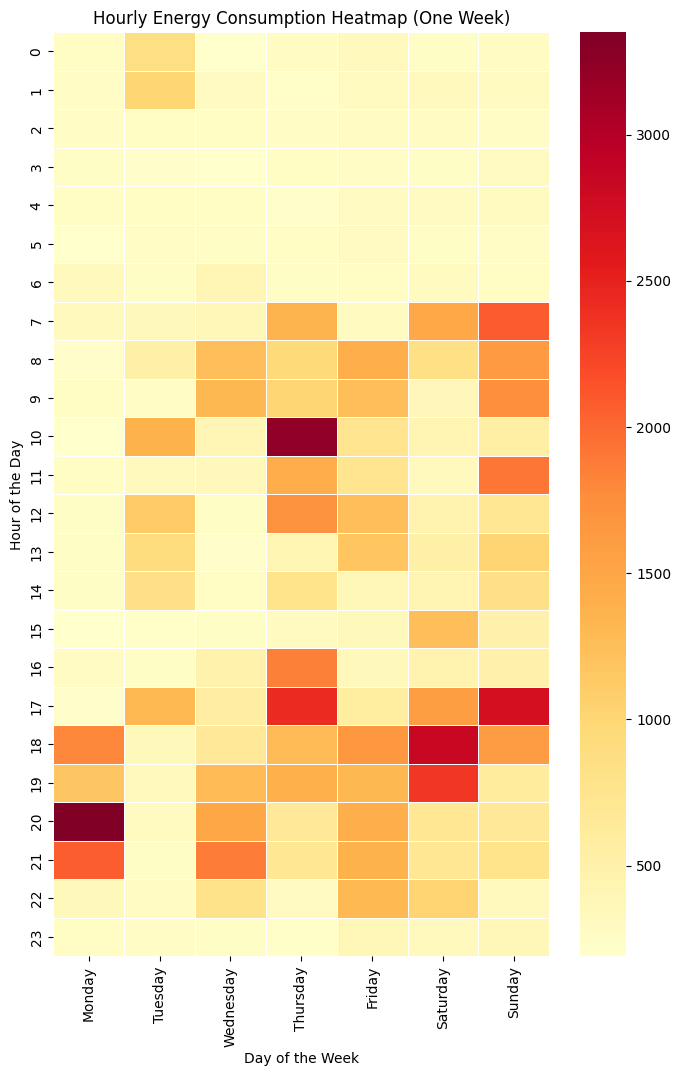

In [103]:
plt.figure(figsize=(8, 12))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, linewidths=.5)
plt.title('Hourly Energy Consumption Heatmap (One Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

In [104]:
energy_consumption=hourly_data['Appliances']

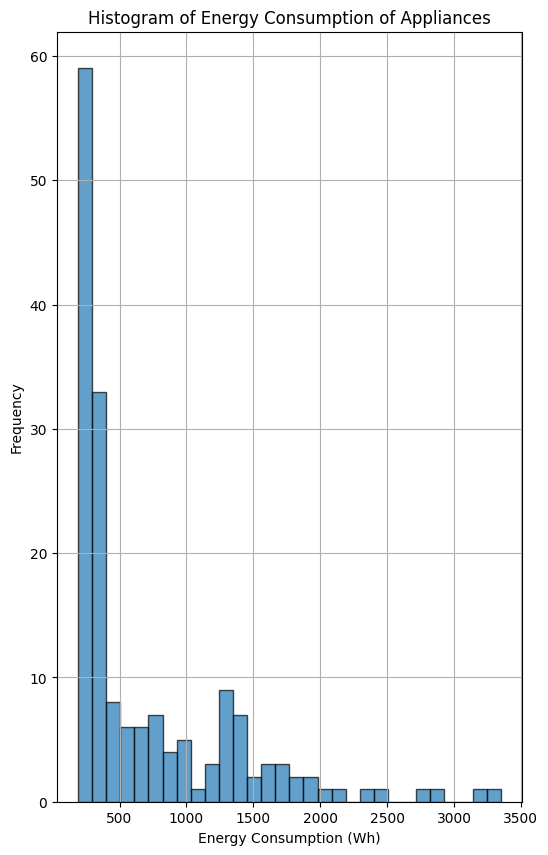

In [105]:
plt.figure(figsize=(6, 10))
plt.hist(energy_consumption, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Energy Consumption of Appliances')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [106]:
df1 = pd.read_csv('energydata_complete.csv') #loading the entire csv again to df1 data frame 
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [107]:
df1['date'] = pd.to_datetime(df1['date'])
df1['NSM'] = df1['date'].dt.hour * 3600 + df1['date'].dt.minute * 60 + df1['date'].dt.second #converts everything to seconds

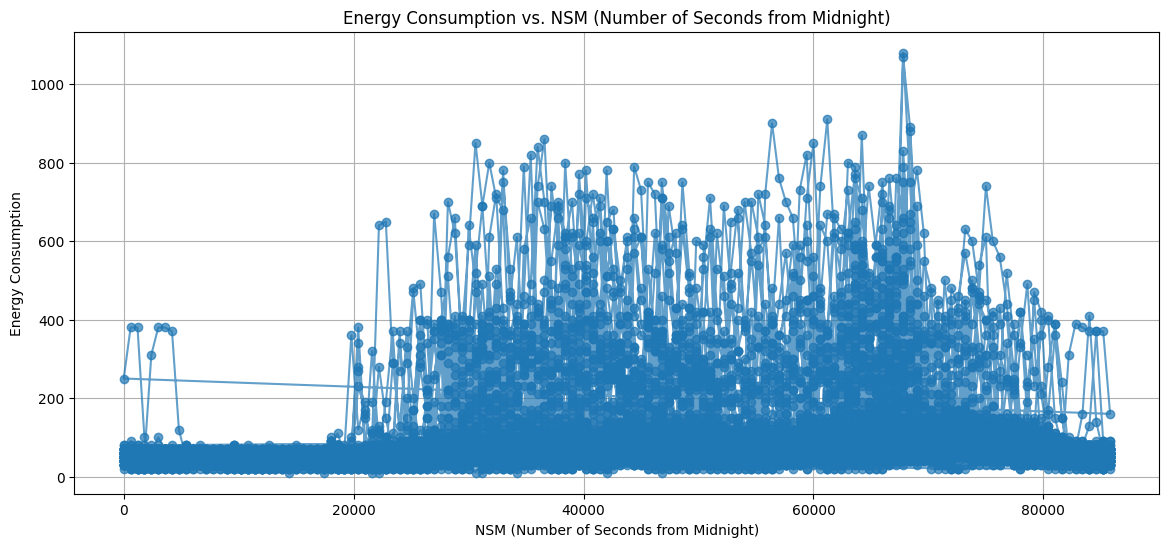

In [108]:
plt.figure(figsize=(14, 6))
plt.plot(df1['NSM'], df1['Appliances'], marker='o', linestyle='-', alpha=0.7)
plt.title('Energy Consumption vs. NSM (Number of Seconds from Midnight)')
plt.xlabel('NSM (Number of Seconds from Midnight)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

In [109]:
df1.columns #I was getting the column name error, this output I can just copy column name as required.

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM'],
      dtype='object')

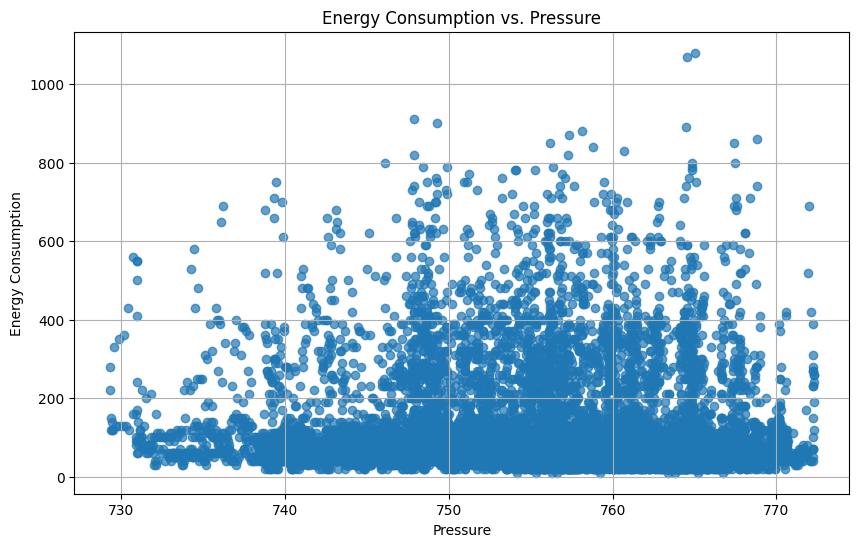

In [110]:
energy_consumption = df1['Appliances']
Press_mm_Hg = df1['Press_mm_hg']
plt.figure(figsize=(10, 6))
plt.scatter(Press_mm_Hg, energy_consumption, alpha=0.7)
plt.title('Energy Consumption vs. Pressure')
plt.xlabel('Pressure')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

comment on effect of factors

for NSM: as the hour of the day goes on we accumulate energy consumption since energy = power * time. So as time goes on we accumalate more energy, for  0 to 20,000 on the plot the energy data 
shows almost low energy consumption. Also, at the end of the day(>= 80,000) we can see that the trend of energy consumption stays constant. We can think of it as the slope remains constant.
for pressure: This is a huge factor as at low pressures it is hard to maintain temperature, the energy consumption hoes high.
both of them have kind of a bell shape, with highly skewed  towards the extreme ends

I also plotted energy vs dewpoint, the plot is normally bell shape at near zero, no skewedness towards extremes.

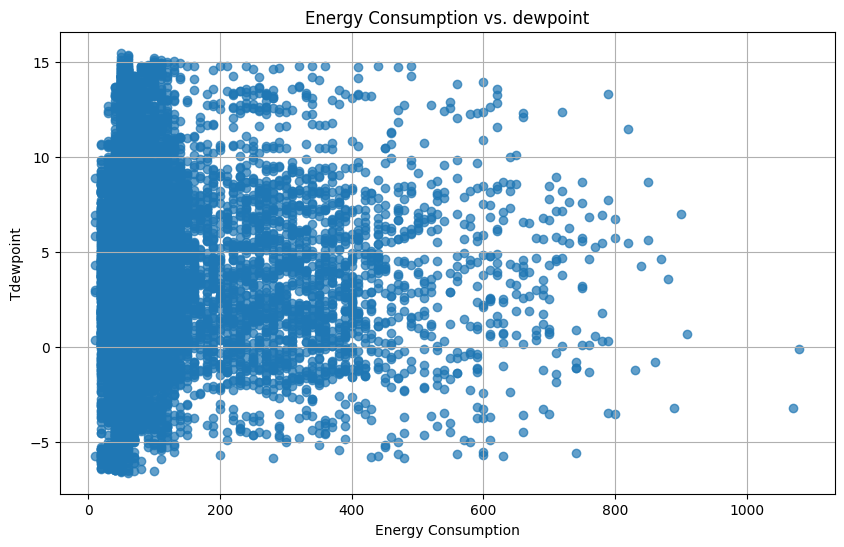

In [111]:
#just to debug the above explanation, to compare effect of dew point, we can see that it is not skewed in any way
plt.figure(figsize=(10, 6))
plt.scatter( df1['Appliances'],df1['Tdewpoint'], alpha=0.7)
plt.title('Energy Consumption vs. dewpoint')
plt.xlabel('Energy Consumption')
plt.ylabel('Tdewpoint')
plt.grid(True)
plt.show()

Question no 3

In [112]:
!pip install scipy

In [115]:
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew

In [116]:
df = pd.read_csv('airfoil_self_noise.dat',sep='\s+', header=None) #we separated on the basis of spaces,
df.head() #debugging

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [117]:
statistics = {} # creating an empty dict to store data
for column in df.columns:
    col_data = df[column]
    statistics[column] = {
        'mean': col_data.mean(),
        'variance': col_data.var(),
        'median': col_data.median(),
        'kurtosis': kurtosis(col_data),
        'skewness': skew(col_data),
        'range': col_data.max() - col_data.min()
    }

In [118]:
for column, stats in statistics.items():
    print(f"Column {column}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value}")
    #column 5 ie column no 6 has targets only.

Column 0:
  mean: 2886.3805721889553
  variance: 9938717.383696876
  median: 1600.0
  kurtosis: 5.685722427734417
  skewness: 2.1349509268138207
  range: 19800
Column 1:
  mean: 6.782302062541583
  variance: 35.024240502572304
  median: 5.4
  kurtosis: -0.41556767886742474
  skewness: 0.6884764219408198
  range: 22.2
Column 2:
  mean: 0.13654823685961412
  variance: 0.008749867864732143
  median: 0.1016
  kurtosis: -1.0385036986844616
  skewness: 0.45700080866491105
  range: 0.27940000000000004
Column 3:
  mean: 50.86074517631405
  variance: 242.5116138251681
  median: 39.6
  kurtosis: -1.5627427144987867
  skewness: 0.2356169672566666
  range: 39.599999999999994
Column 4:
  mean: 0.011139880391217565
  variance: 0.00017292866127210953
  median: 0.00495741
  kurtosis: 2.2075390546067792
  skewness: 1.7004653179096092
  range: 0.058010618
Column 5:
  mean: 124.83594278110448
  variance: 47.59146318314193
  median: 125.721
  kurtosis: -0.31713243440698324
  skewness: -0.4185339558133514
